# Estatísticas do Conjunto de Treino
## Diabetic Retinopathy Detection Dataset

Este notebook analisa as estatísticas do conjunto de dados de treinamento, incluindo:
- Distribuição de classes
- Proporções e percentuais
- Visualizações gráficas
- Análise de desbalanceamento

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


## 1. Carregar Dados

In [2]:
# Caminho para o arquivo CSV com labels
csv_path = 'data/train_labels_v2.csv'

# Carregar dados
df = pd.read_csv(csv_path)

print(f"✓ Dataset carregado: {csv_path}")
print(f"  Total de amostras: {len(df):,}")
print(f"\nPrimeiras linhas:")
df.head()

✓ Dataset carregado: data/train_labels_v2.csv
  Total de amostras: 35,124

Primeiras linhas:


,image,level
0,10003_left.jpeg,0
1,10003_right.jpeg,0
2,10007_left.jpeg,0
3,10007_right.jpeg,0
4,10009_left.jpeg,0


## 2. Informações Gerais do Dataset

In [3]:
# Informações do DataFrame
print("="*80)
print("INFORMAÇÕES DO DATASET")
print("="*80)
print(f"\nDimensões: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print(f"\nTipos de dados:")
print(df.dtypes)
print(f"\nValores nulos:")
print(df.isnull().sum())

INFORMAÇÕES DO DATASET

Dimensões: (35124, 2)
Colunas: ['image', 'level']

Tipos de dados:
image    object
level     int64
dtype: object

Valores nulos:
image    0
level    0
dtype: int64


## 3. Distribuição de Classes

**Classes de Retinopatia Diabética:**
- **Classe 0**: Sem Retinopatia (No DR)
- **Classe 1**: Retinopatia Diabética Leve (Mild DR)
- **Classe 2**: Retinopatia Diabética Moderada (Moderate DR)
- **Classe 3**: Retinopatia Diabética Severa (Severe DR)
- **Classe 4**: Retinopatia Diabética Proliferativa (Proliferative DR)

In [4]:
# Contagem de amostras por classe
class_counts = df['level'].value_counts().sort_index()

# Calcular proporções e percentuais
total_samples = len(df)
class_proportions = class_counts / total_samples
class_percentages = class_proportions * 100

# Criar DataFrame com estatísticas
stats_df = pd.DataFrame({
    'Classe': class_counts.index,
    'Quantidade': class_counts.values,
    'Proporção': class_proportions.values,
    'Percentual (%)': class_percentages.values
})

# Adicionar nomes descritivos das classes
class_names = {
    0: 'Sem Retinopatia',
    1: 'DR Leve',
    2: 'DR Moderada',
    3: 'DR Severa',
    4: 'DR Proliferativa'
}
stats_df['Nome'] = stats_df['Classe'].map(class_names)

# Reordenar colunas
stats_df = stats_df[['Classe', 'Nome', 'Quantidade', 'Proporção', 'Percentual (%)']]

print("="*80)
print("DISTRIBUIÇÃO DE CLASSES")
print("="*80)
print(f"\nTotal de amostras: {total_samples:,}")
print(f"Número de classes: {len(class_counts)}")
print("\n" + stats_df.to_string(index=False))

stats_df

DISTRIBUIÇÃO DE CLASSES

Total de amostras: 35,124
Número de classes: 5

 Classe             Nome  Quantidade  Proporção  Percentual (%)
      0  Sem Retinopatia       25808   0.734768       73.476825
      1          DR Leve        2443   0.069554        6.955358
      2      DR Moderada        5292   0.150666       15.066621
      3        DR Severa         873   0.024855        2.485480
      4 DR Proliferativa         708   0.020157        2.015716


,Classe,Nome,Quantidade,Proporção,Percentual (%)
0,0,Sem Retinopatia,25808,0.734768,73.476825
1,1,DR Leve,2443,0.069554,6.955358
2,2,DR Moderada,5292,0.150666,15.066621
3,3,DR Severa,873,0.024855,2.485480
4,4,DR Proliferativa,708,0.020157,2.015716


## 4. Análise de Desbalanceamento

In [5]:
# Calcular métricas de desbalanceamento
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class

# Calcular pesos balanceados (como usado no treinamento)
from sklearn.utils.class_weight import compute_class_weight

classes = np.arange(len(class_counts))
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=np.repeat(classes, class_counts.values)
)

print("="*80)
print("ANÁLISE DE DESBALANCEAMENTO")
print("="*80)
print(f"\nClasse mais frequente: {class_counts.idxmax()} ({class_names[class_counts.idxmax()]})")
print(f"  Quantidade: {max_class:,} amostras ({max_class/total_samples*100:.2f}%)")
print(f"\nClasse menos frequente: {class_counts.idxmin()} ({class_names[class_counts.idxmin()]})")
print(f"  Quantidade: {min_class:,} amostras ({min_class/total_samples*100:.2f}%)")
print(f"\nRazão de desbalanceamento: {imbalance_ratio:.2f}:1")
print(f"  (A classe mais frequente tem {imbalance_ratio:.2f}x mais amostras que a menos frequente)")

print(f"\n{'='*80}")
print("PESOS DE CLASSE BALANCEADOS (usados no treinamento)")
print("='*80)")
for i, weight in enumerate(class_weights):
    print(f"  Classe {i} ({class_names[i]}): {weight:.4f}")

# Adicionar pesos ao DataFrame de estatísticas
stats_df['Peso Balanceado'] = class_weights
stats_df

ANÁLISE DE DESBALANCEAMENTO

Classe mais frequente: 0 (Sem Retinopatia)
  Quantidade: 25,808 amostras (73.48%)

Classe menos frequente: 4 (DR Proliferativa)
  Quantidade: 708 amostras (2.02%)

Razão de desbalanceamento: 36.45:1
  (A classe mais frequente tem 36.45x mais amostras que a menos frequente)

PESOS DE CLASSE BALANCEADOS (usados no treinamento)
='*80)
  Classe 0 (Sem Retinopatia): 0.2722
  Classe 1 (DR Leve): 2.8755
  Classe 2 (DR Moderada): 1.3274
  Classe 3 (DR Severa): 8.0467
  Classe 4 (DR Proliferativa): 9.9220


,Classe,Nome,Quantidade,Proporção,Percentual (%),Peso Balanceado
0,0,Sem Retinopatia,25808,0.734768,73.476825,0.272195
1,1,DR Leve,2443,0.069554,6.955358,2.875481
2,2,DR Moderada,5292,0.150666,15.066621,1.327438
3,3,DR Severa,873,0.024855,2.485480,8.046735
4,4,DR Proliferativa,708,0.020157,2.015716,9.922034


## 5. Visualizações

### 5.1 Gráfico de Barras - Contagem por Classe

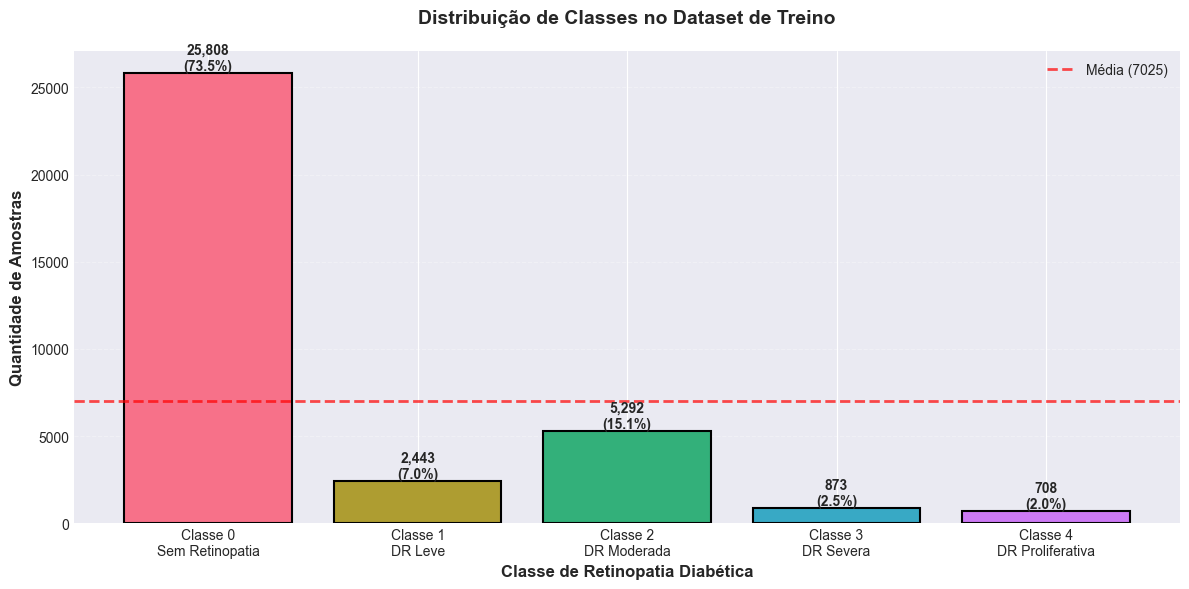

✓ Gráfico salvo: dataset_class_distribution.png


In [6]:
# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette("husl", len(class_counts))
bars = ax.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', linewidth=1.5)

# Adicionar valores no topo das barras
for i, (bar, count) in enumerate(zip(bars, class_counts.values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({count/total_samples*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configurar labels e título
ax.set_xlabel('Classe de Retinopatia Diabética', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade de Amostras', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de Classes no Dataset de Treino', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(class_counts.index)
ax.set_xticklabels([f'Classe {i}\n{class_names[i]}' for i in class_counts.index], fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar linha de referência (média)
mean_count = total_samples / len(class_counts)
ax.axhline(y=mean_count, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Média ({mean_count:.0f})')
ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('dataset_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico salvo: dataset_class_distribution.png")

### 5.2 Gráfico de Pizza - Proporções

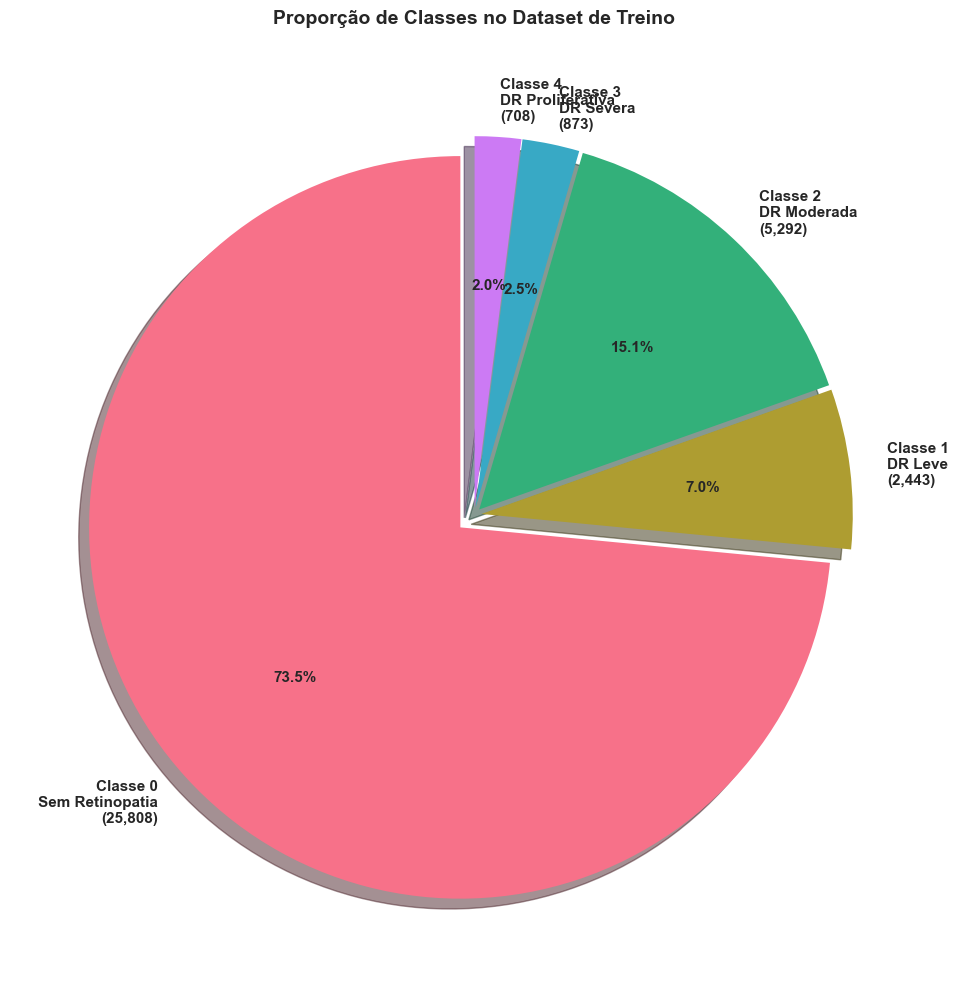

✓ Gráfico salvo: dataset_class_proportions.png


In [7]:
# Gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 10))

colors = sns.color_palette("husl", len(class_counts))
explode = [0.05 if i == class_counts.idxmax() else 0.02 for i in class_counts.index]

wedges, texts, autotexts = ax.pie(
    class_counts.values,
    labels=[f'Classe {i}\n{class_names[i]}' for i in class_counts.index],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=90,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

# Adicionar contagens aos labels
for i, wedge in enumerate(wedges):
    texts[i].set_text(f'Classe {class_counts.index[i]}\n{class_names[class_counts.index[i]]}\n({class_counts.values[i]:,})')

ax.set_title('Proporção de Classes no Dataset de Treino', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('dataset_class_proportions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico salvo: dataset_class_proportions.png")

### 5.3 Gráfico de Pesos Balanceados

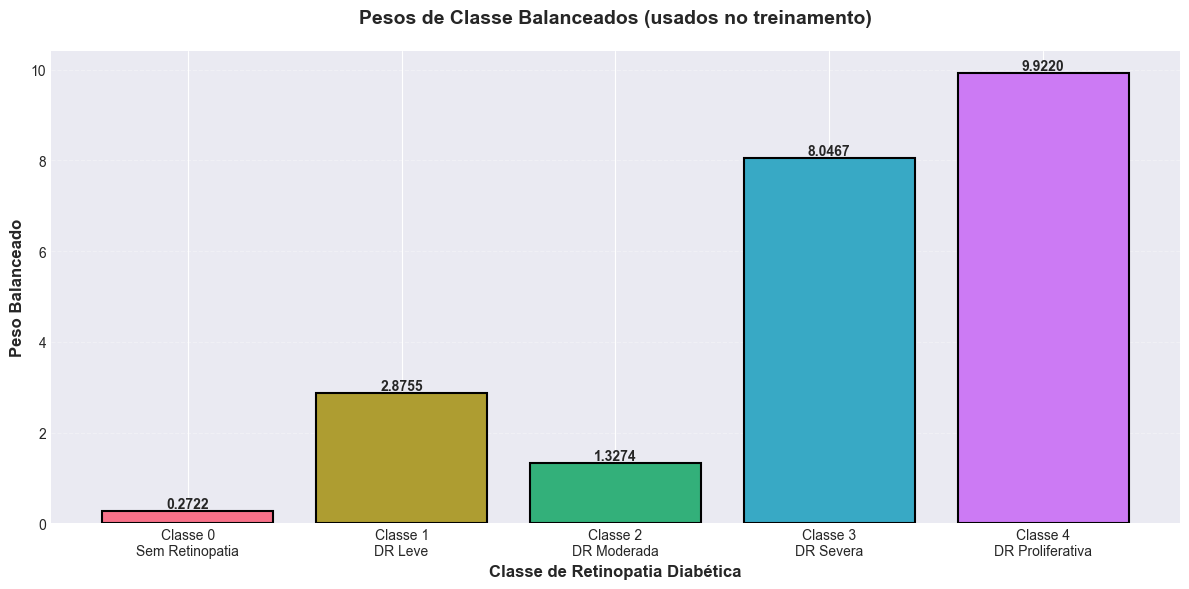

✓ Gráfico salvo: dataset_class_weights.png


In [8]:
# Gráfico de pesos balanceados
fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette("husl", len(class_weights))
bars = ax.bar(classes, class_weights, color=colors, edgecolor='black', linewidth=1.5)

# Adicionar valores no topo das barras
for bar, weight in zip(bars, class_weights):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{weight:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configurar labels e título
ax.set_xlabel('Classe de Retinopatia Diabética', fontsize=12, fontweight='bold')
ax.set_ylabel('Peso Balanceado', fontsize=12, fontweight='bold')
ax.set_title('Pesos de Classe Balanceados (usados no treinamento)', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(classes)
ax.set_xticklabels([f'Classe {i}\n{class_names[i]}' for i in classes], fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('dataset_class_weights.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico salvo: dataset_class_weights.png")

## 6. Resumo Executivo

In [9]:
print("="*80)
print("RESUMO EXECUTIVO DO DATASET")
print("="*80)
print(f"\n📊 TAMANHO DO DATASET")
print(f"  • Total de amostras: {total_samples:,}")
print(f"  • Número de classes: {len(class_counts)}")
print(f"\n📈 DISTRIBUIÇÃO")
for i in class_counts.index:
    print(f"  • Classe {i} ({class_names[i]}):")
    print(f"      Quantidade: {class_counts[i]:,} ({class_counts[i]/total_samples*100:.2f}%)")
    print(f"      Peso balanceado: {class_weights[i]:.4f}")
print(f"\n⚖️ DESBALANCEAMENTO")
print(f"  • Classe majoritária: Classe {class_counts.idxmax()} ({class_names[class_counts.idxmax()]})")
print(f"  • Classe minoritária: Classe {class_counts.idxmin()} ({class_names[class_counts.idxmin()]})")
print(f"  • Razão de desbalanceamento: {imbalance_ratio:.2f}:1")
print(f"\n💡 OBSERVAÇÕES")
if imbalance_ratio > 10:
    print(f"  • ⚠️ Dataset ALTAMENTE desbalanceado (razão > 10:1)")
    print(f"  • ✓ Uso de pesos balanceados é ESSENCIAL")
    print(f"  • ✓ Considerar técnicas de data augmentation")
elif imbalance_ratio > 5:
    print(f"  • ⚠️ Dataset MODERADAMENTE desbalanceado (razão > 5:1)")
    print(f"  • ✓ Uso de pesos balanceados é RECOMENDADO")
else:
    print(f"  • ✓ Dataset relativamente balanceado (razão < 5:1)")
    print(f"  • ✓ Pesos balanceados podem ajudar, mas não são críticos")
print(f"\n📁 ARQUIVOS GERADOS")
print(f"  • dataset_class_distribution.png")
print(f"  • dataset_class_proportions.png")
print(f"  • dataset_class_weights.png")
print(f"\n{'='*80}")

RESUMO EXECUTIVO DO DATASET

📊 TAMANHO DO DATASET
  • Total de amostras: 35,124
  • Número de classes: 5

📈 DISTRIBUIÇÃO
  • Classe 0 (Sem Retinopatia):
      Quantidade: 25,808 (73.48%)
      Peso balanceado: 0.2722
  • Classe 1 (DR Leve):
      Quantidade: 2,443 (6.96%)
      Peso balanceado: 2.8755
  • Classe 2 (DR Moderada):
      Quantidade: 5,292 (15.07%)
      Peso balanceado: 1.3274
  • Classe 3 (DR Severa):
      Quantidade: 873 (2.49%)
      Peso balanceado: 8.0467
  • Classe 4 (DR Proliferativa):
      Quantidade: 708 (2.02%)
      Peso balanceado: 9.9220

⚖️ DESBALANCEAMENTO
  • Classe majoritária: Classe 0 (Sem Retinopatia)
  • Classe minoritária: Classe 4 (DR Proliferativa)
  • Razão de desbalanceamento: 36.45:1

💡 OBSERVAÇÕES
  • ⚠️ Dataset ALTAMENTE desbalanceado (razão > 10:1)
  • ✓ Uso de pesos balanceados é ESSENCIAL
  • ✓ Considerar técnicas de data augmentation

📁 ARQUIVOS GERADOS
  • dataset_class_distribution.png
  • dataset_class_proportions.png
  • dataset_clas

## 7. Exportar Estatísticas

In [10]:
# Salvar estatísticas em CSV
stats_df.to_csv('dataset_statistics.csv', index=False)
print("✓ Estatísticas salvas: dataset_statistics.csv")

# Salvar resumo em TXT
with open('dataset_summary.txt', 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("ESTATÍSTICAS DO DATASET DE TREINO\n")
    f.write("Diabetic Retinopathy Detection\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Total de amostras: {total_samples:,}\n")
    f.write(f"Número de classes: {len(class_counts)}\n\n")
    
    f.write("-"*80 + "\n")
    f.write("DISTRIBUIÇÃO POR CLASSE\n")
    f.write("-"*80 + "\n\n")
    
    f.write(stats_df.to_string(index=False))
    f.write("\n\n")
    
    f.write("-"*80 + "\n")
    f.write("ANÁLISE DE DESBALANCEAMENTO\n")
    f.write("-"*80 + "\n\n")
    
    f.write(f"Classe majoritária: {class_counts.idxmax()} ({class_names[class_counts.idxmax()]})\n")
    f.write(f"  Quantidade: {max_class:,} ({max_class/total_samples*100:.2f}%)\n\n")
    f.write(f"Classe minoritária: {class_counts.idxmin()} ({class_names[class_counts.idxmin()]})\n")
    f.write(f"  Quantidade: {min_class:,} ({min_class/total_samples*100:.2f}%)\n\n")
    f.write(f"Razão de desbalanceamento: {imbalance_ratio:.2f}:1\n")
    f.write("\n" + "="*80 + "\n")

print("✓ Resumo salvo: dataset_summary.txt")

print("\n" + "="*80)
print("✅ ANÁLISE COMPLETA!")
print("="*80)
print("\nArquivos gerados:")
print("  📊 dataset_statistics.csv")
print("  📄 dataset_summary.txt")
print("  🖼️ dataset_class_distribution.png")
print("  🖼️ dataset_class_proportions.png")
print("  🖼️ dataset_class_weights.png")

✓ Estatísticas salvas: dataset_statistics.csv
✓ Resumo salvo: dataset_summary.txt

✅ ANÁLISE COMPLETA!

Arquivos gerados:
  📊 dataset_statistics.csv
  📄 dataset_summary.txt
  🖼️ dataset_class_distribution.png
  🖼️ dataset_class_proportions.png
  🖼️ dataset_class_weights.png
